In [1]:
import pandas as pd

In [3]:
# 1. read data, from source
# "Courses.csv" file has been renamed
course_df = pd.read_csv("Courses.csv")

In [4]:
# 2. drop rows with NaN values for any column, specifically 'Description'
# Course with no description won't be of much use
course_df = course_df.dropna(how='any')

In [5]:
# 3. Pre-processing step: remove words like we'll, you'll, they'll etc.
course_df['Description'] = course_df['Description'].replace({"'ll": " "}, regex=True)

In [8]:
# 4. Another Pre-preprocessing step: Removal of '-' from the CourseId field
course_df['CourseId'] = course_df['CourseId'].replace({"-": " "}, regex=True)

In [9]:
# 5. Combine three columns namely: CourseId, CourseTitle, Description
comb_frame = course_df.CourseId.str.cat(" "+course_df.CourseTitle.str.cat(" "+course_df.Description))

In [10]:
# 6. Remove all characters except numbers & alphabets
# Numbers are retained as they are related to specific course series also
comb_frame = comb_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

In [20]:
# Create word vectors from combined frames
# Make sure to make necessary imports
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)

In [18]:
# true_k, derived from elbow method and confirmed from pluralsight's website
true_k = 8

In [21]:
# Running model with 15 different centroid initializations & maximum iterations are 500
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=8, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
# Top terms in each clusters.print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 3ds
 max
 modeling
 animation
 create
 techniques
 required
 creating
 software
 learn
 start
 vray
 tutorial
 rigging
 game
Cluster 1:
 photoshop
 effects
 zbrush
 create
 cc
 software
 required
 learn
 creating
 cinema
 tutorial
 3d
 4d
 illustrator
 unity
Cluster 2:
 sharepoint
 angular
 2010
 conference
 19
 2013
 session
 2019
 denver
 server
 course
 web
 learn
 site
 microsoft
Cluster 3:
 course
 learn
 security
 web
 code
 applications
 use
 using
 application
 fundamentals
 design
 play
 youll
 management
 knowledge
Cluster 4:
 azure
 microsoft
 services
 cloud
 data
 course
 storage
 solutions
 service
 knowledge
 learn
 applications
 security
 virtual
 application
Cluster 5:
 data
 big
 course
 learn
 using
 database
 analysis
 analytics
 knowledge
 session
 business
 science
 use
 machine
 youll
Cluster 6:
 windows
 server
 sql
 10
 course
 exchange
 configure
 2012
 2008
 2016
 administration
 directory
 2003
 configuring
 network
Cluster 7:
 maya
 animation
 m

In [24]:
# Continuing after vectorization step# data-structure to store Sum-Of-Square-Errors
sse = {}# Looping over multiple values of k from 1 to 30
for k in range(1, 3):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    comb_frame["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

In [26]:
import matplotlib.pyplot as plt

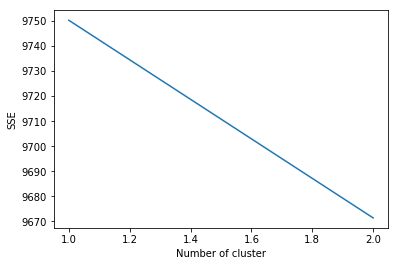

In [27]:
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# Save the Plot in current directory
plt.savefig('elbow_method.png')

In [28]:
k=30
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)

In [30]:
import pickle
# Save machine learning model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
def cluster_predict(str_input):
    Y = vectorizer.transform(list(str_input))
    prediction = model.predict(Y)
    return prediction

In [32]:
# Create new column for storing predicted categories from our trained model.
course_df['ClusterPrediction'] = ""

In [33]:
# load the complete data in a dataframe
course_df = pd.read_csv("Courses.csv")# drop retired course from analysis. But, courses with no descriptions are kept.
course_df = course_df[course_df.IsCourseRetired == 'no']
    
# create new column in dataframe which is combination of (CourseId, CourseTitle, Description) in existing data-frame
course_df['InputString'] = course_df.CourseId.str.cat(" "+course_df.CourseTitle.str.cat(" "+course_df.Description))# Create new column for storing predicted categories from our trained model.
course_df['ClusterPrediction'] = ""# Cluster category for each live course
course_df['ClusterPrediction']=course_df.apply(lambda x: cluster_predict(course_df['InputString']), axis=0)

In [34]:
course_df

,CourseId,CourseTitle,DurationInSeconds,ReleaseDate,Description,AssessmentStatus,IsCourseRetired,InputString,ClusterPrediction
1,abts-fundamentals,BizTalk 2006 Fundamentals,24305,2008-06-01,Despite the trend towards service-oriented arc...,Live,no,abts-fundamentals BizTalk 2006 Fundamentals De...,3
2,agile-team-practice-fundamentals,Agile Team Practices with Scrum,13421,2010-04-15,This course is much different than most of the...,Live,no,agile-team-practice-fundamentals Agile Team Pr...,3
19,btsr2-fundamentals,BizTalk Server 2006 R2 Fundamentals,21996,2008-08-20,BizTalk Server 2006 is Microsoft's integration...,None,no,btsr2-fundamentals BizTalk Server 2006 R2 Fund...,6
31,linq-architecture,LINQ Architecture,4997,2010-10-08,This course looks at using LINQ in the busines...,Live,no,linq-architecture LINQ Architecture This cours...,3
37,patterns-library,Design Patterns Library,56286,2010-09-10,The design patterns library contains descripti...,Live,no,patterns-library Design Patterns Library The d...,3
39,sharepoint-administration,SharePoint 2007 Tutorial for Site Administrators,7739,2010-03-24,"Microsoft Office SharePoint Server 2007, provi...",Live,no,sharepoint-administration SharePoint 2007 Tuto...,2
48,sp2010-client-object-model,SharePoint Development with the CSOM and REST API,12501,2010-09-24,The SharePoint 2010 Client Object Model is a s...,Live,no,sp2010-client-object-model SharePoint Developm...,2
50,sql-server-bi,SQL Server Business Intelligence Overview,13674,2010-05-10,This course introduces you to some of the Busi...,Live,no,sql-server-bi SQL Server Business Intelligence...,6
51,sql-server-fundamentals,SQL Server Fundamentals,29558,2010-06-15,This course is primarily for C# developers who...,Live,no,sql-server-fundamentals SQL Server Fundamental...,6
52,sql-server-tsql,SQL Server - TSQL,17221,2010-03-22,This course is primarily for C# developers who...,Live,no,sql-server-tsql SQL Server - TSQL This course ...,6
